# Lab 1- Exploring Digital Sampling, Fourier Transforms, and both DSB and SSB Mixers
## By Adam, Cee, Grace, Scout

In [18]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt

### 4.2 Our First Digital Sampling: the Nyquist Criterion
##### Sampling frequency (Vsamp) 
Vsamp = 62.5 MHz 
##### Signal frequency (Vsig) 
We sampled 62.5 * (0.1, 0.2, 9.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)

In [3]:
#Step one, obtain data
x = ugradio.pico.capture_data('1V', divisor=1, nsamples=700)
#Save data

Define the time range so that the center time is the zero point. With N even, there is no center time, so make the times run from -N/2/Vsamp to (N/2 - 1)/Vsamp.

In [284]:
N = 512
time = np.linspace(-N/(2*62.5),(N/2-1)/62.5,N)

### 4.3 Fourier Voltage and Power Spectra

For each dataset, plot the digitally sampled waveform vs. time. Plot both the sampled points and the lines connecting the points. Compare your plot with your oscilliscope trace.

Derive and plot the Fourier power spectrum using ugradio.dft.dft

In [ ]:
# Fourier analysis

def fa(file,Vsig):
    
    Vsamp = 62.5 #MHz
    
    print('Vsig = {}{}'.format(Vsig, 'MHz'), Vsig/Vsamp)
    file9 = np.loadtxt(file)
    
    plt.subplot(3,1,1)
    
    
    #time domain signal - plot digitally sampled waveform vs time
    plt.plot(time[N/2:N/2 + 21],file9[N/2:N/2 + 21],'k.-')
    plt.title("Time vs. Signal")
    plt.xlabel("Time [micro sec]")
    plt.ylabel("Signal")
    plt.show()


    #Fourier voltage spectrum - have real and imaginary parts
    # frequency domain signal
    '''The output is a function of frequency, so you have to specify 
    the frequencies for which you want the output. Suggested: make the 
    frequency increment equal to Vsamp/N over a total range of just under
    Vsamp. Thus, you calculate a voltage spectrum running from -Vsamp/2 to
    not quite Vsamp/2.'''
    
    f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N)
    
    f,fx = ugradio.dft.dft(file9[:N],t=time, f = f_input, vsamp=62.5)

    plt.plot(f,fx.real, label = "Real")
    plt.plot(f,fx.imag, label = "Imaginary")
    plt.axvline(x=0, color = 'k', linestyle = '--') #Hermitian symmetry
    plt.title("Fourier Voltage Spectrum")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Signal")
    plt.legend()
    plt.show()

    print(Vsamp/2)

    # Fourier power spectrum
    '''Power is proportional to voltage squared.
    We want the sum of the squares of the real and imaginary parts.'''
    
    ''' Option 1: Multiply the voltage by its complex conjugate(*)'''
    
    P = fx*np.conj(fx)
    
    '''Option 2: Square the length of the complex vector'''
    
    P = np.abs(fx)**2
    
    plt.plot(f,P)
    plt.title("Fourier Power Spectrum")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Signal")
    plt.show()
    

#Plot time series, voltage spectrum, power spectrum for all files
    
fa('data_0.1', Vsig = 6.25)
fa('data_0.2', Vsig = 12.5)
fa('data_0.3', Vsig = 18.75)
fa('data_0.4', Vsig = 25.0)
fa('data_0.5', Vsig = 31.25)
fa('data_0.6', Vsig = 37.5)
fa('data_0.7', Vsig = 43.75)
fa('data_0.8', Vsig = 50.0)
fa('data_0.9', Vsig = 56.25)

Choose one of the power spectra and take its inverse Fourier transform. For this to work, you need to make sure your DFT correctly infers which array bins in your power spectrum correspond to which frequencies.

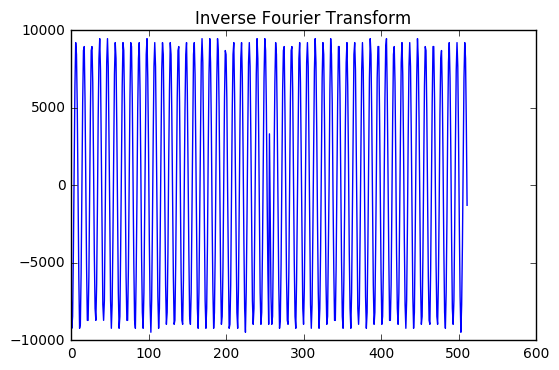

In [244]:
# Inverse Fourier

t, xt = ugradio.dft.idft(fx, f=f, t=time, vsamp=62.5)
plt.plot(xt)
plt.title("Inverse Fourier Transform")
plt.show()

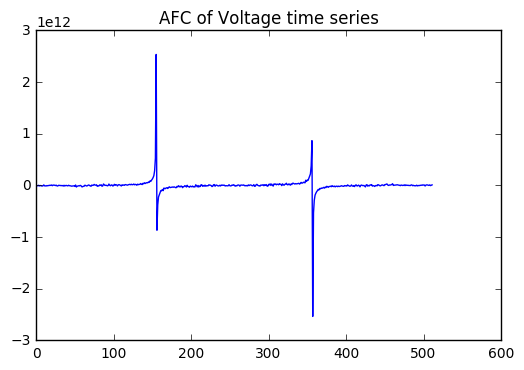

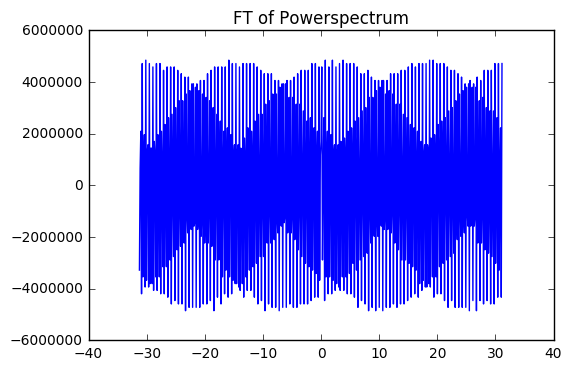

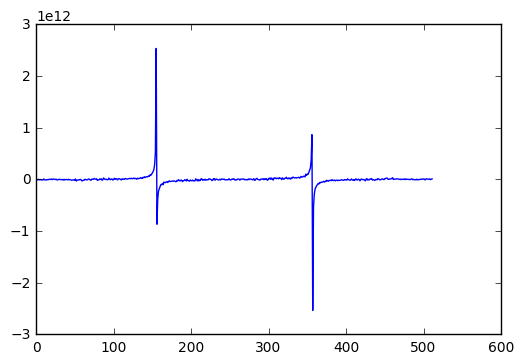

In [248]:
#Autocorrelation Function
afc = np.correlate(fx.real, fx.imag, "same")
plt.plot(afc)
plt.title('AFC of Voltage time series')
plt.show()
#power_spectrum()

#FT of Powerspectrum
f,ft_power = ugradio.dft.dft(fx,t=time, vsamp=62.5)
plt.plot(x,ft_power)
plt.title('FT of Powerspectrum')
plt.show()

plt.plot(afc - ft_power)
plt.show()

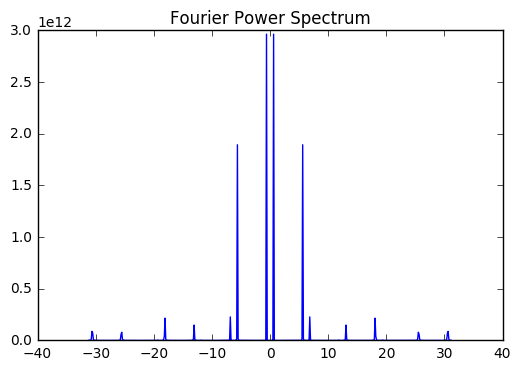

In [122]:
# Leakage Power

file9 = np.loadtxt('data_0.9')

N = 512
time = np.linspace(-N/(.2*62.5),(N/.2-1)/62.5,N)

#Fourier voltage spectrum

f,fx = ugradio.dft.dft(file9[:N],t=time, vsamp=62.5)

# Fourier power spectrum

P = np.abs(fx)**2
plt.plot(f,P)
plt.title("Fourier Power Spectrum")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
#frequency resolution


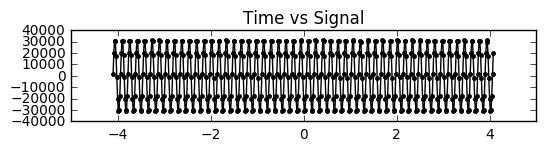

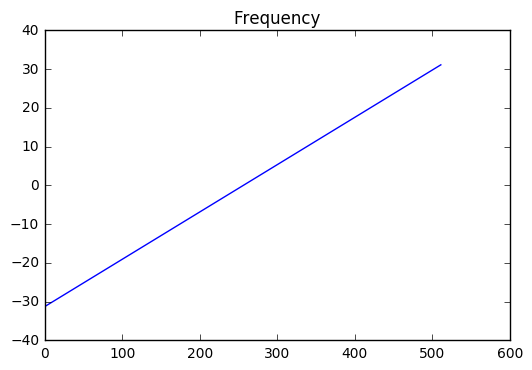

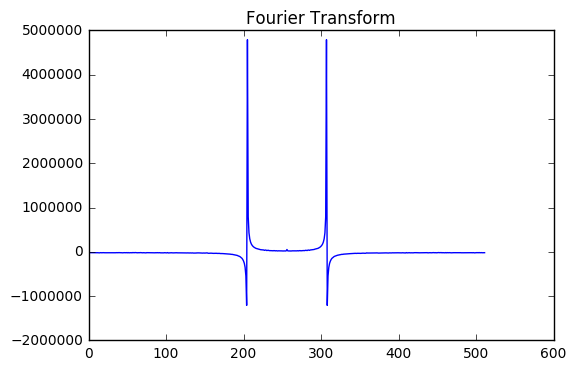

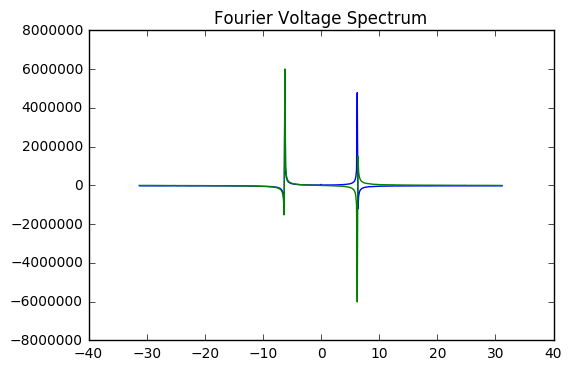

In [88]:
file1 = np.loadtxt('data_0.1')

N = 512
time = np.linspace(-N/(2*62.5),(N/2-1)/62.5,N)
plt.subplot(3,1,1)

plt.plot(time,file1[:N],'k.-')
plt.title("Time vs Signal")
plt.show()

f,fx = ugradio.dft.dft(file1[:N],t=time, vsamp=62.5)
#P = np.abs(fx)**2

plt.plot(f)
plt.title("Frequency")
plt.show()
plt.plot(fx)
plt.title("Fourier Transform")
plt.show()

plt.plot(f,fx.real)
plt.plot(f,fx.imag)
plt.title("Fourier Voltage Spectrum")
plt.show()


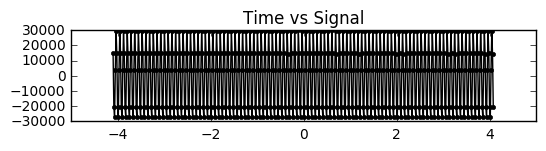

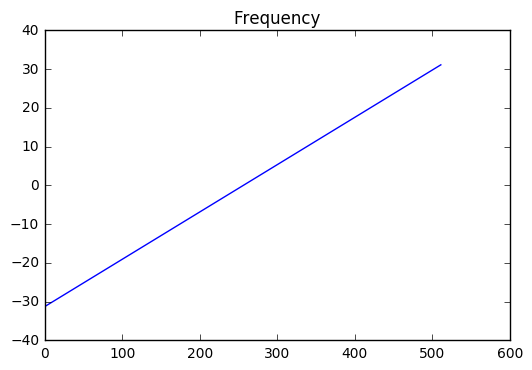

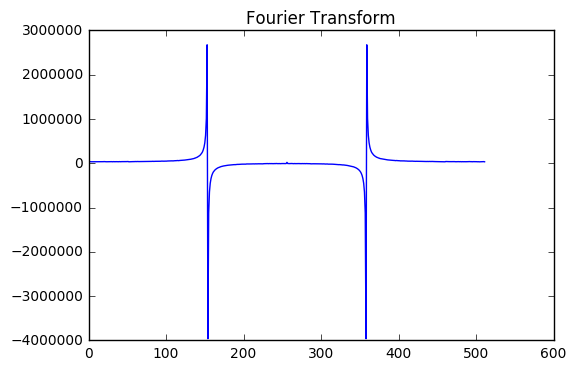

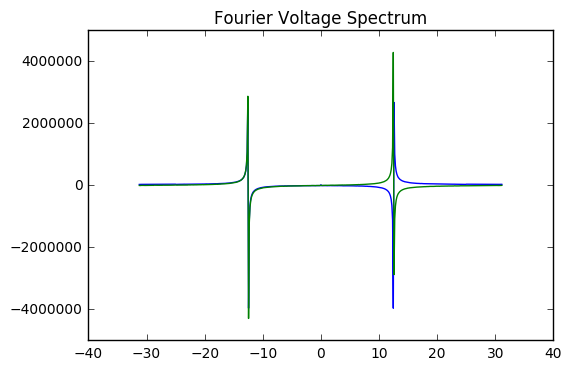

In [89]:
file2 = np.loadtxt('data_0.2')

N = 512
time = np.linspace(-N/(2*62.5),(N/2-1)/62.5,N)
plt.subplot(3,1,1)

plt.plot(time,file2[:N],'k.-')
plt.title("Time vs Signal")
plt.show()

f,fx = ugradio.dft.dft(file2[:N],t=time, vsamp=62.5)
#P = np.abs(fx)**2

plt.plot(f)
plt.title("Frequency")
plt.show()
plt.plot(fx)
plt.title("Fourier Transform")
plt.show()

plt.plot(f,fx.real)
plt.plot(f,fx.imag)
plt.title("Fourier Voltage Spectrum")
plt.show()


In [45]:
Xk = fx
Pk = Xk*np.conj(Xk)
N = 128
chan = np.linspace(-N/2,N/2,num=N,endpoint=False)
fig2,ax2 = plt.subplots(1,1)
ax2.axhline(0,c='k')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('k')

ax2.vlines(x=chan,ymin=0,ymax=np.real(Pk))
ax2.plot(chan,np.real(Pk),ls='None',marker='o',c='b',label='Real')
ax2.plot(chan,np.imag(Pk),c='g',label='Imag')
ax2.legend()

ValueError: x and y must have same first dimension

In [21]:
ugradio.dft??


In [89]:
#Convert x-axis from samples to time units
samples_in_a_period = 10
time_in_a_period = 160
time_conversion_factor = time_in_a_period/samples_in_a_period
print(time_conversion_factor)

16


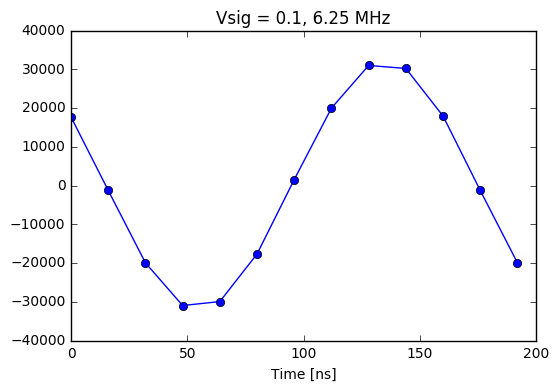

In [113]:
x1 = time_conversion_factor* (np.arange(0, len(file1[4:17])))
plt.plot(x, file1[4:17], 'o-')
plt.title("Vsig = 0.1, 6.25 MHz")
plt.xlabel('Time [ns]')
plt.show()

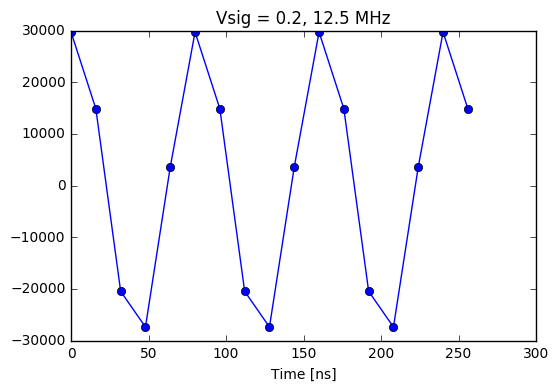

In [130]:
file2 = np.loadtxt('data_0.2')
x2 = time_conversion_factor * (np.arange(0, len(file2[4:21])))
plt.plot(x, file2[4:21],'o-')
plt.title("Vsig = 0.2, 12.5 MHz")
plt.xlabel('Time [ns]')
plt.show()

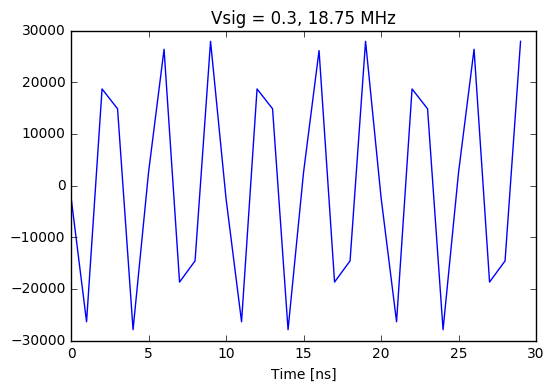

In [76]:
file3 = np.loadtxt('data_0.3')
x = time_conversion_factor * (np.arange(0, len(file2[4:21])))
plt.plot(x, file3[:30])
plt.title("Vsig = 0.3, 18.75 MHz")
plt.xlabel('Time [ns]')
plt.show()

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


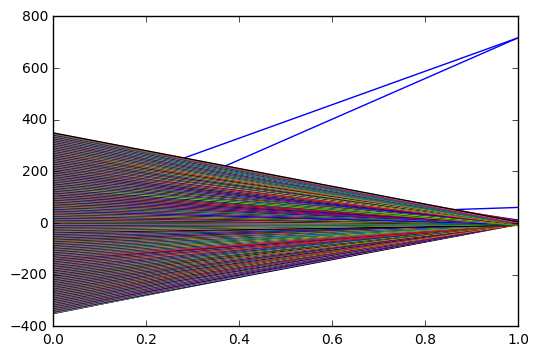

In [141]:
xt = ugradio.dft.idft(file1)
np.shape(xt)
plt.plot(xt)
plt.show()

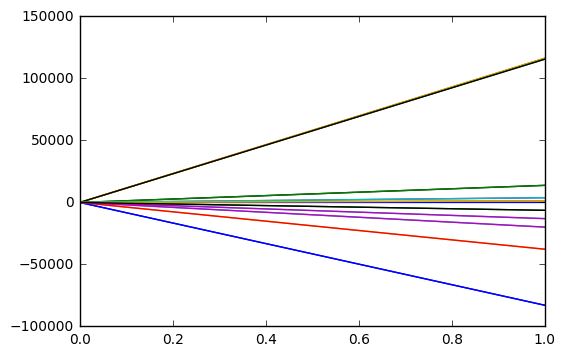

In [154]:
F = ugradio.dft.dft(file1[:21])
np.shape(F)
plt.plot(F)
plt.show()

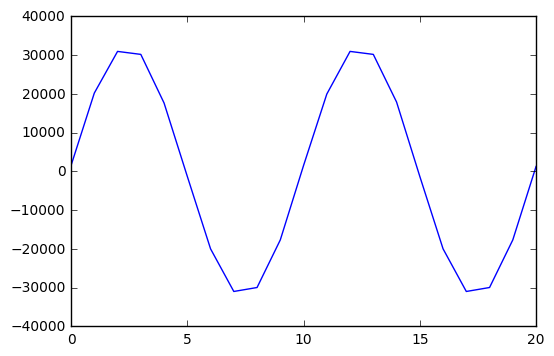

In [155]:
plt.plot(file1[:21])
plt.show()

In [169]:
idft = ugradio.dft.idft(file1)

In [170]:
ugradio.dft?